# Geometric distribution Example

You select special pears above a minimal weight for a food
retailer. You recorded **4 trials** and their number of tries before
getting a pear with an adequate weight: **16, 8, 12 and 24**.

In what range is the rate of success $\theta$, i.e. what’s the fraction $\theta$
of pears above the minimal weight? What’s the probability, that
this fraction is **smaller than 3%**? Take a **Beta(2; 20)-prior** on $\theta$.
How does the probability change if you assume a flat prior?

[1] 0.9571622

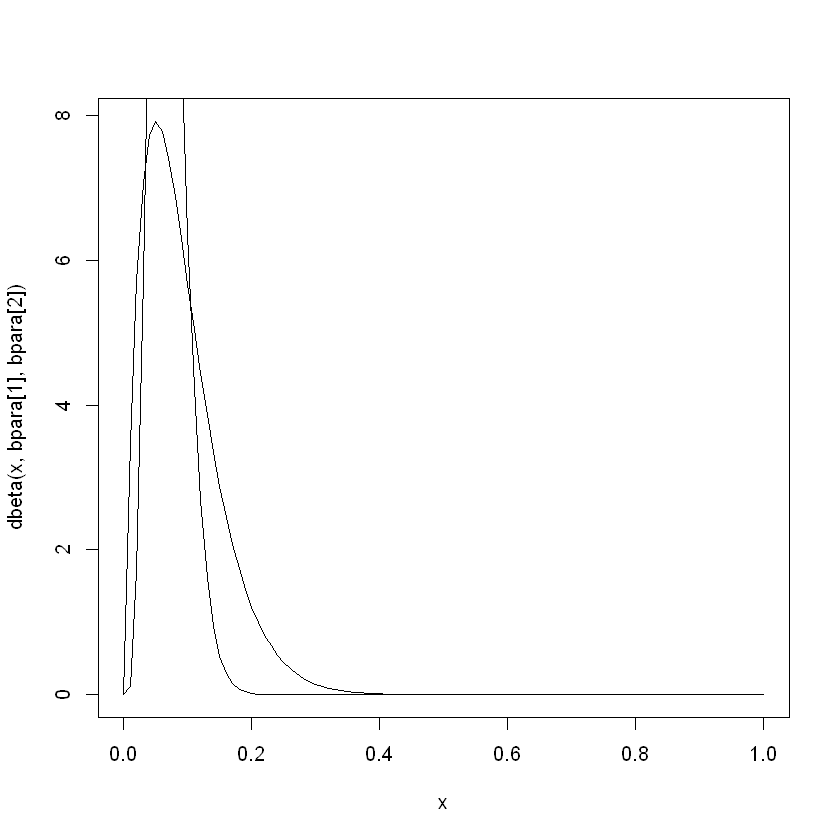

In [20]:
bpara = c(2, 20)
trials = 4
tot=16+8+12+24

options(repr.plot.width=7, repr.plot.height=7)
curve(dbeta(x, bpara[1], bpara[2]), 0, 1)
curve(dbeta(x, bpara[1] + trials, bpara[2] + tot), 0, 1, add=T)

1 - pbeta(0.03, bpara[1] + trials, bpara[2] + tot) #the fraction of pears is less than 3%

# Poisson model example

You recorded the counts of new customers on a daily basis for
16 days: 2 3 8 10 4 5 8 7 2 12 4 3 7 6 4 11.  

The data can be assumed to be Poisson distributed with
unknown but fixed parameter $\lambda$. The prior on the parameter $\lambda$ is
**Gamma(5; 1)**. Calculate a **90% credible interval** for $\lambda$. Whats
the probability, that you have at least 5 new customers per day
on average?

In [38]:
days = 16
g_shape = 5
g_scale = 1
c_interval = c(.05,.95)

In [39]:
tot = sum(c(2, 3, 8, 10, 4, 5, 8, 7, 2, 12, 4, 3, 7, 6, 4, 11))
tot

[1] 96

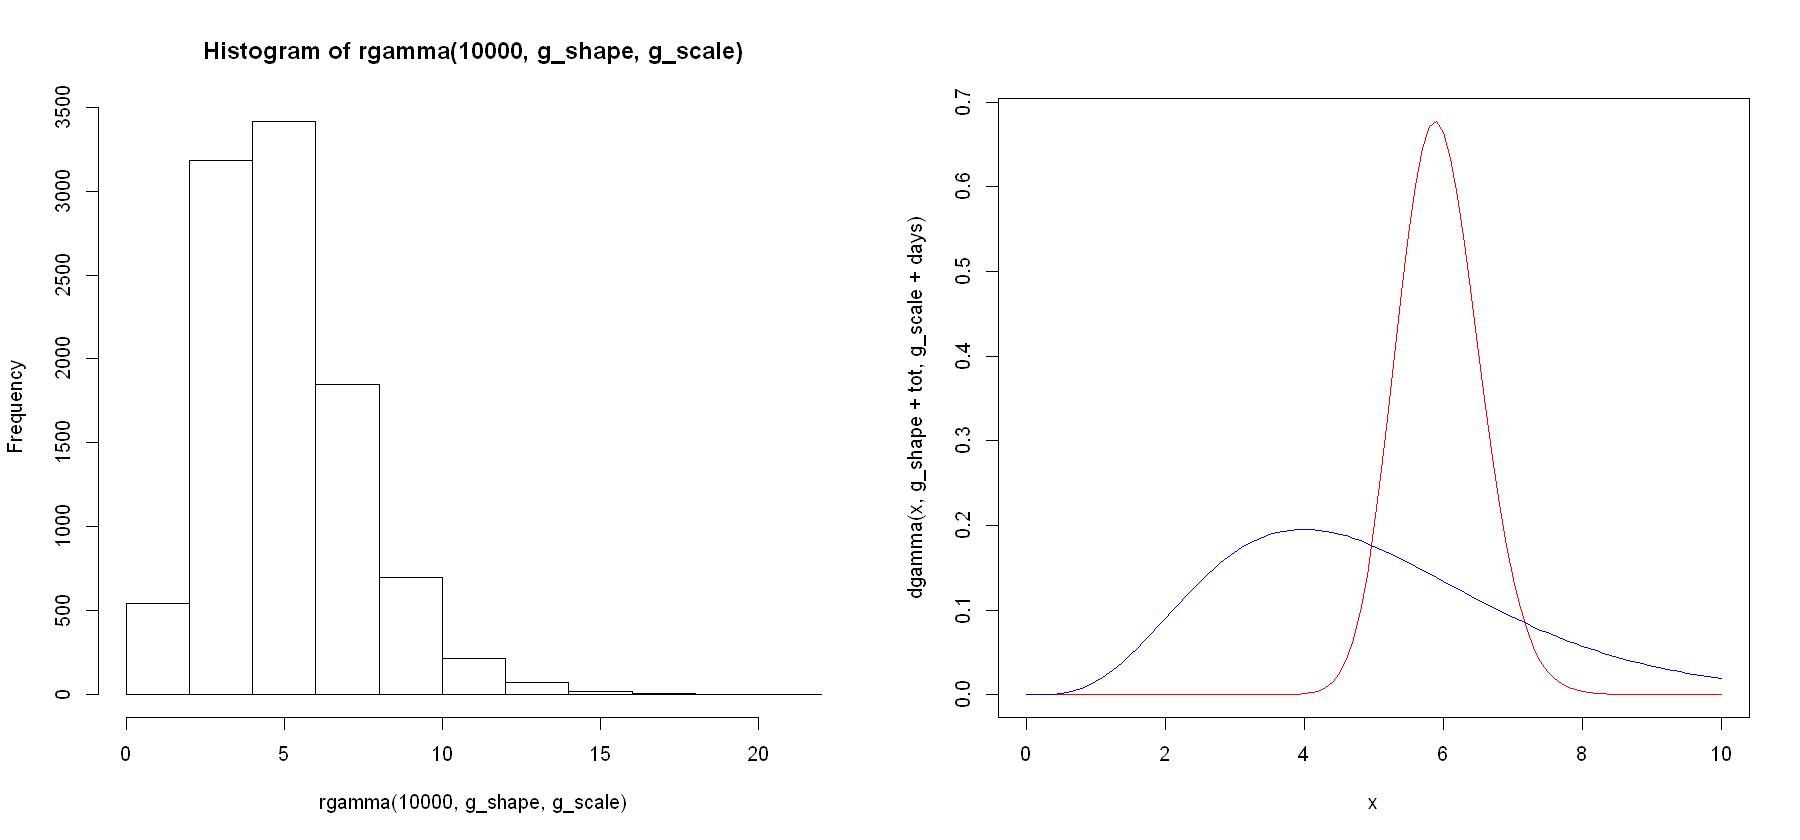

In [59]:
options(repr.plot.width=15, repr.plot.height=7)
par(mfrow=c(1,2))
hist(rgamma(10000,g_shape,g_scale)) # gamma(5, 1)
curve(dgamma(x,g_shape+tot,g_scale+days),0,10, col="red") # gamma(5 + 96, 1 + 16)
curve(dgamma(x,g_shape,g_scale),0,10,add=T, col="blue") # gamma(5, 1)

In [46]:
quantile(rgamma(10000,g_shape+tot,g_scale+days),c_interval)

5%      95% 
4.994302 6.956421

In [47]:
qgamma(c_interval,g_shape+tot,g_scale+days)

[1] 5.003361 6.945840

In [48]:
1 - pgamma(g_shape,g_shape+tot,g_scale+days)

[1] 0.9506547

# Hypergeometric distribution

In [64]:
library("rmutil")

You checked a random sample of **size 5** from a box with **20
electronic devices**. None of the devices had failures.

What’s the posterior distribution on the number of devices with
failures in the box, when the prior on the number of devices with
failures is **BetaBinom(20; 1; 20)**? Plot the posterior distribution.  
What’s the probability that the container contains no insufficient
device? What’s the probability, when you assume a flat prior?

Posterior probability: $M \sim BetaBin(15; 1 + 0; 20 + 5)$

In [67]:
options(repr.plot.width=7, repr.plot.height=7)
plot( 0:15,dbetabinom(0:15,15,1/(1+25),1+25),type="h")
dbetabinom(0,15,1/(1+25),1+25)

[1] 0.625

Post. prob. with flat prior: $BetaBin(15,1+0,1+5)$

[1] 0.2857143

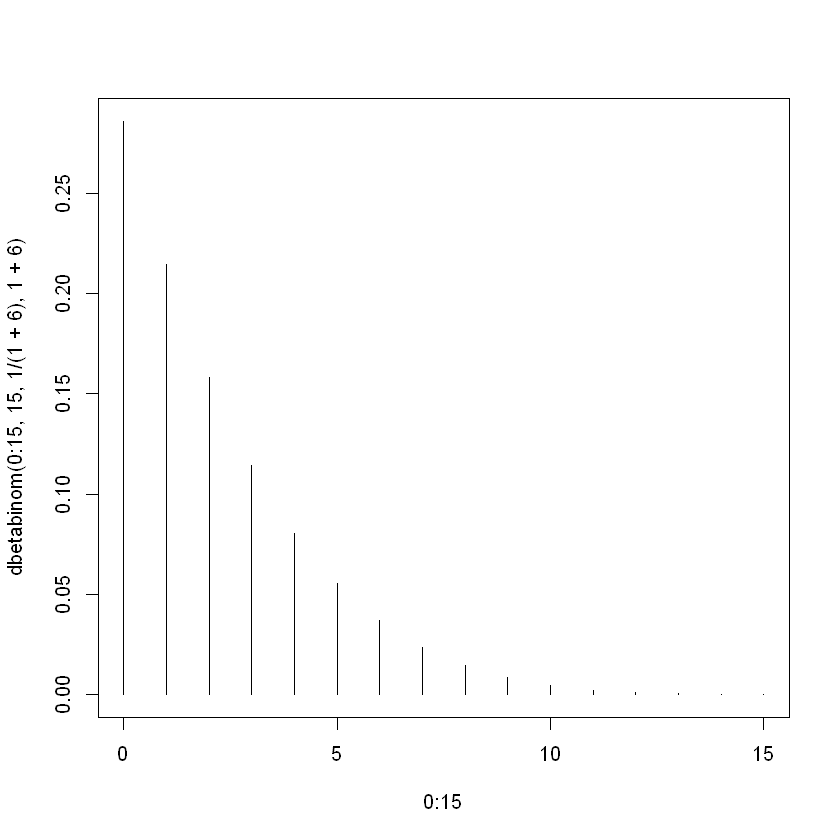

In [68]:
plot( 0:15,dbetabinom(0:15,15,1/(1+6),1+6),type="h")
dbetabinom(0,15,1/(1+6),1+6)

## Example modified

Assume that you checked instead 10 devices and observed 2
failures from your box of size 20. Plot the posterior probabilities
on the number of defect devices in the box with a
BetaBinom(20; 1; 20) prior and a flat prior.

With a BetaBinom(20; 1; 20) prior the posterior becomes:
$M - 2 \sim  BetaBin(10; 1 + 2; 20 + 8)$

In [70]:
plot(2:12, dbetabinom(0:10,10,3/31,31),type="h")

With a flat prior (BetaBinom(20; 1; 1)) the posterior becomes:
$M - 2 \sim BetaBin(10; 1 + 2; 1 + 8)$

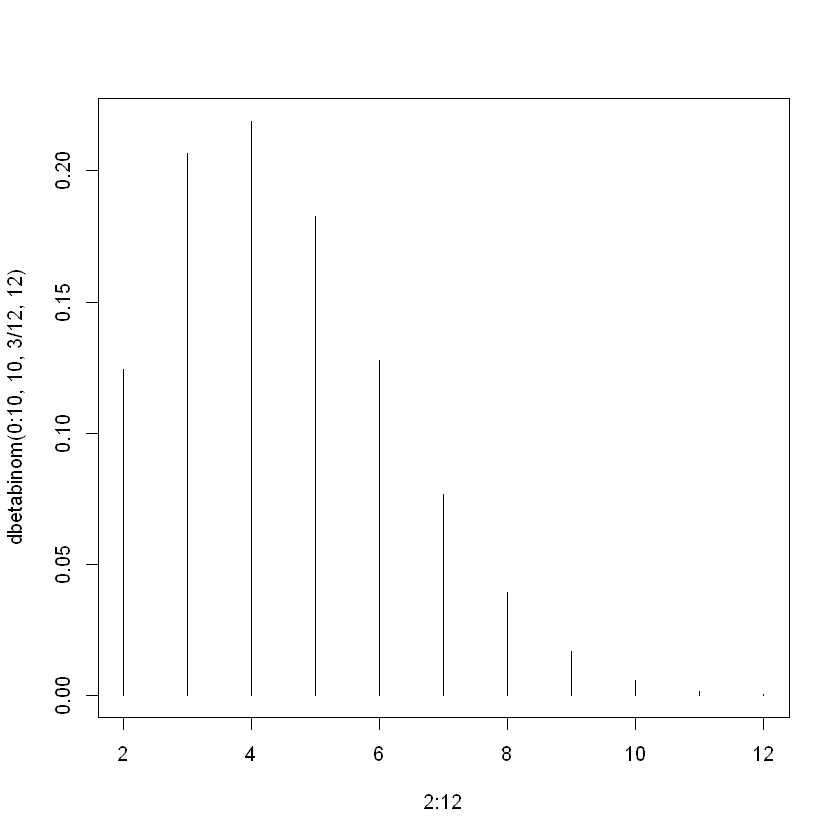

In [71]:
plot(2:12, dbetabinom(0:10,10,3/12,12),type="h")